In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [2]:
moons = make_moons(n_samples=1000, noise=0.1, random_state=0)
x = moons[0]
y = moons[1]

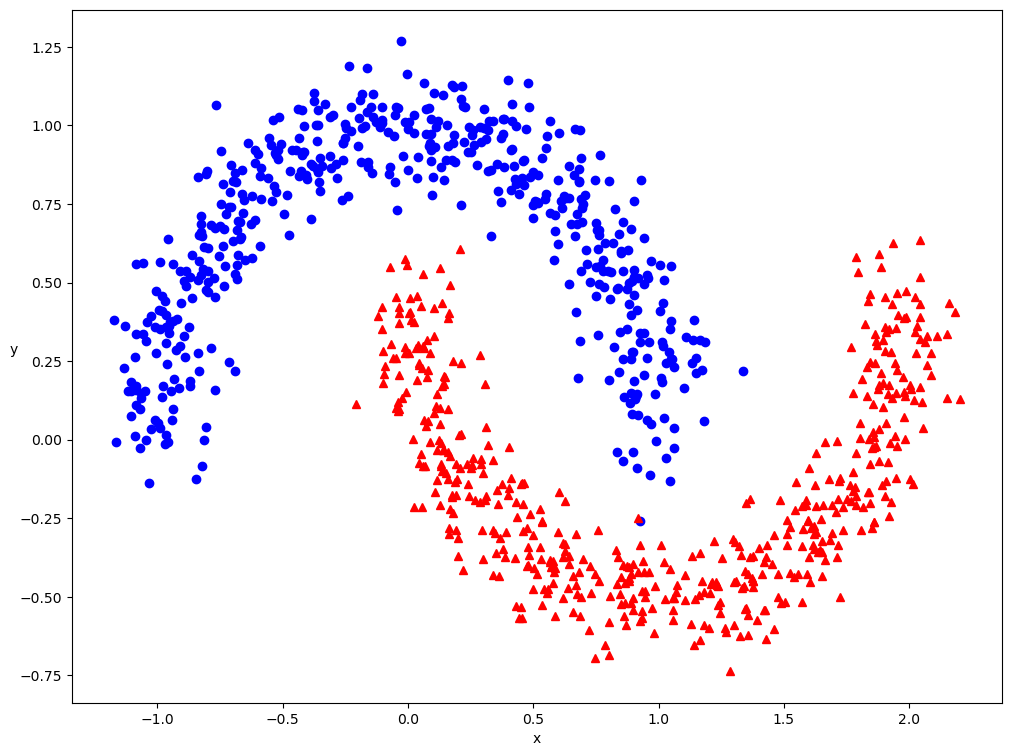

In [3]:
def plot_dataset(x, t):
    plt.plot(x[:, 0][t==0], x[:, 1][t==0], 'bo') 
    plt.plot(x[:, 0][t==1], x[:, 1][t==1], 'r^') 
    plt.xlabel('x') 
    plt.ylabel('y', rotation=0)
    
plt.figure(figsize=(12, 9)) 
plot_dataset(x, y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [5]:
def decision_boundary(model, ax, title):    
    disp = DecisionBoundaryDisplay.from_estimator(model, x, response_method="predict", xlabel="x", ylabel="y", alpha=0.5, ax=ax)
    ax.set_title(title)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    disp.ax_.scatter(x[:, 0], x[:, 1], c=y, edgecolor="k", cmap=custom_cmap)

In [6]:
def plot_model(classifier, title):
    depth_list = [1,2,3,4,5,6]
    fig, axes = plt.subplots(2, 3, figsize=(12, 9))
    for ax, n_depth in zip(fig.axes, depth_list): 
        model = classifier(max_depth=n_depth, random_state=0)
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        sub_title = "depth({0}), score({1})".format(n_depth, score)
        decision_boundary(model, ax, sub_title)
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()
    return model

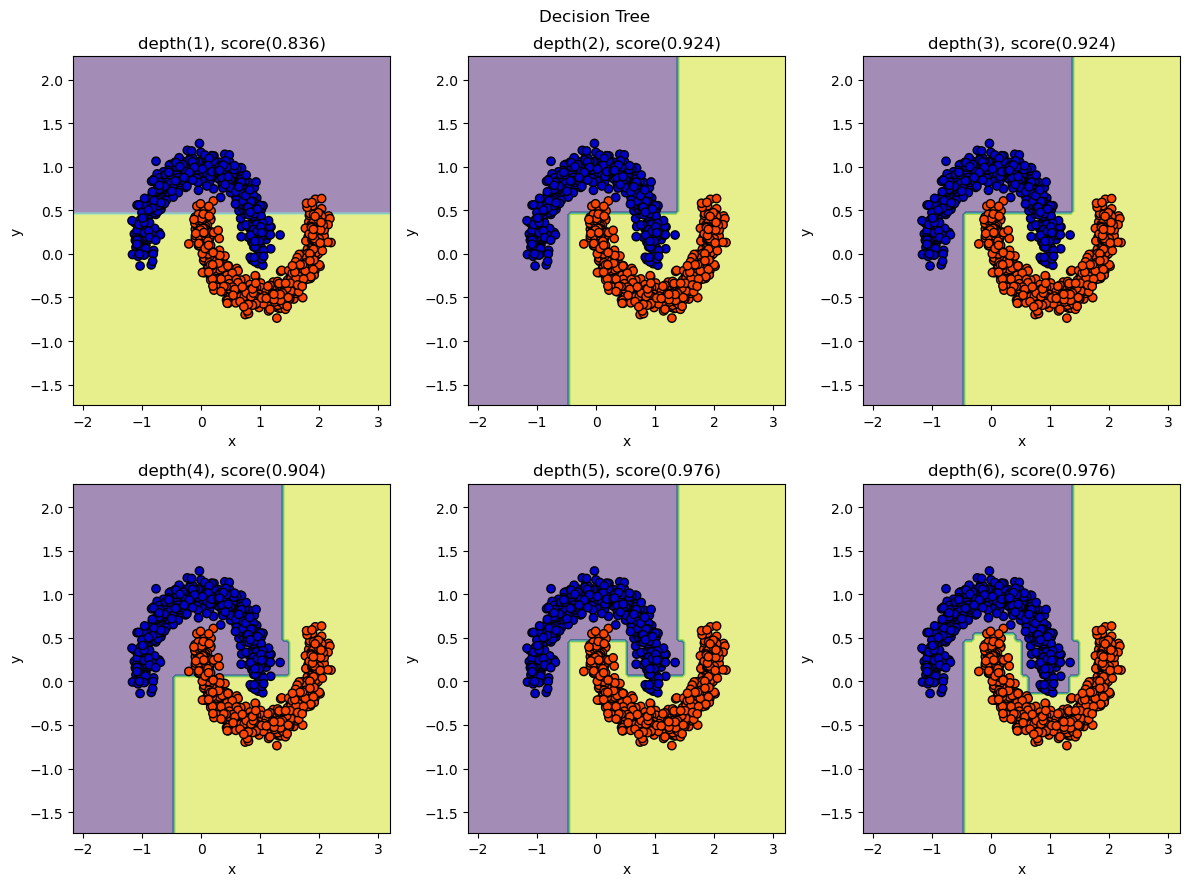

In [7]:
tree = plot_model(DecisionTreeClassifier, "Decision Tree")

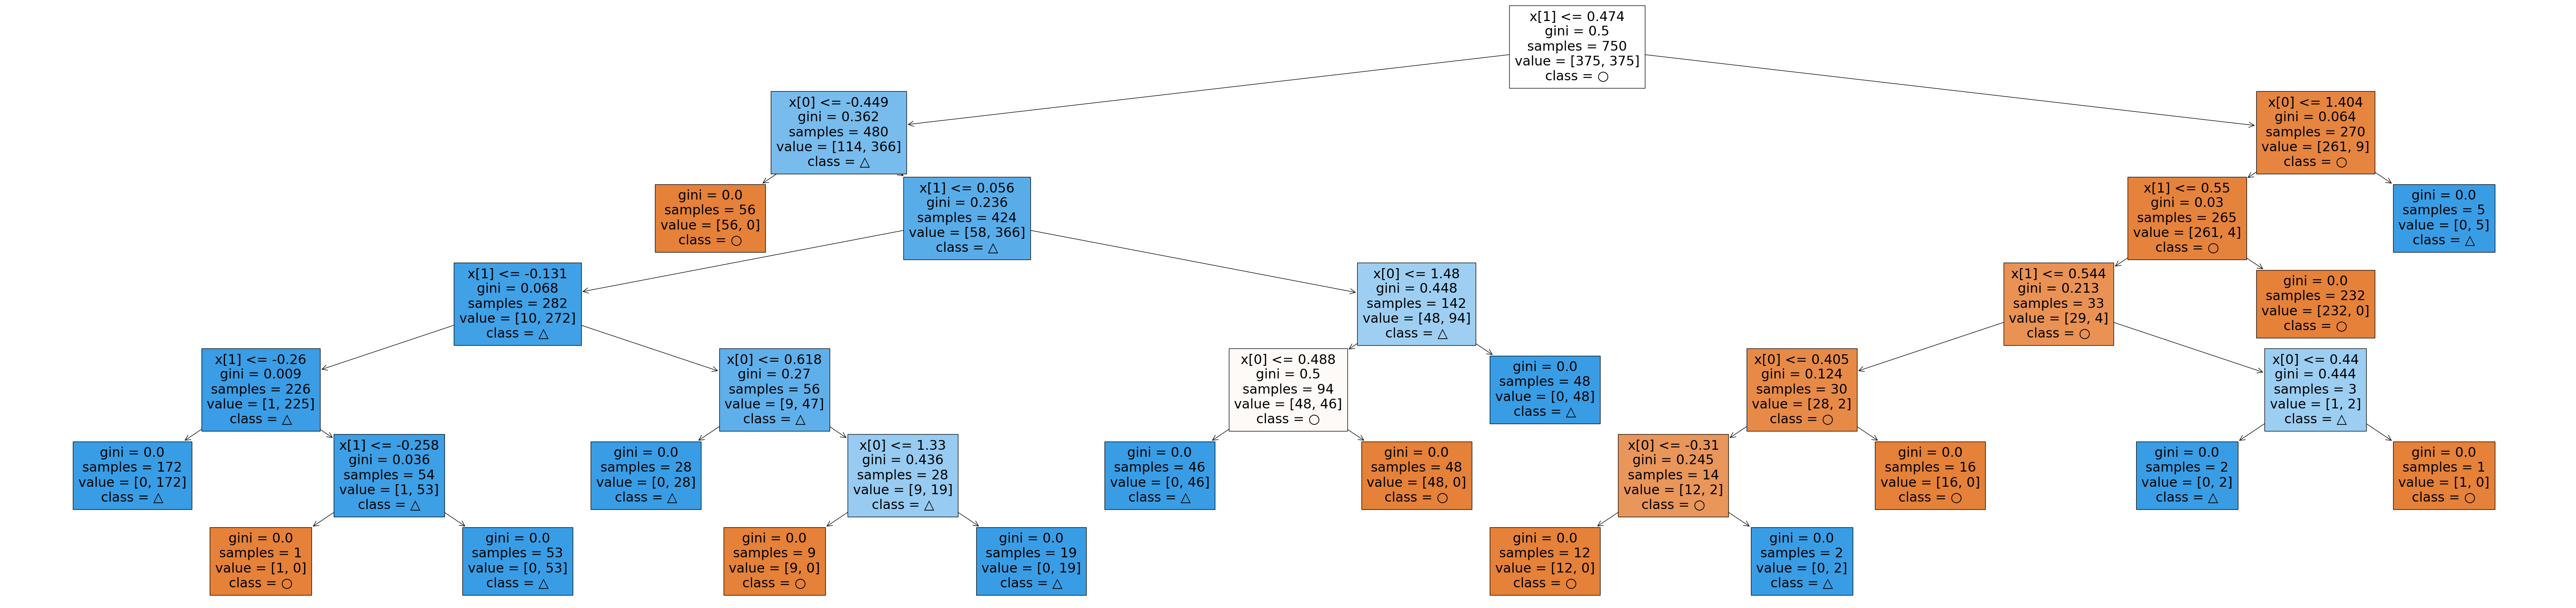

In [8]:
plt.figure(figsize=(85, 20))
plot_tree(tree, max_depth=6, class_names=['○', '△'], filled=True)
plt.show()

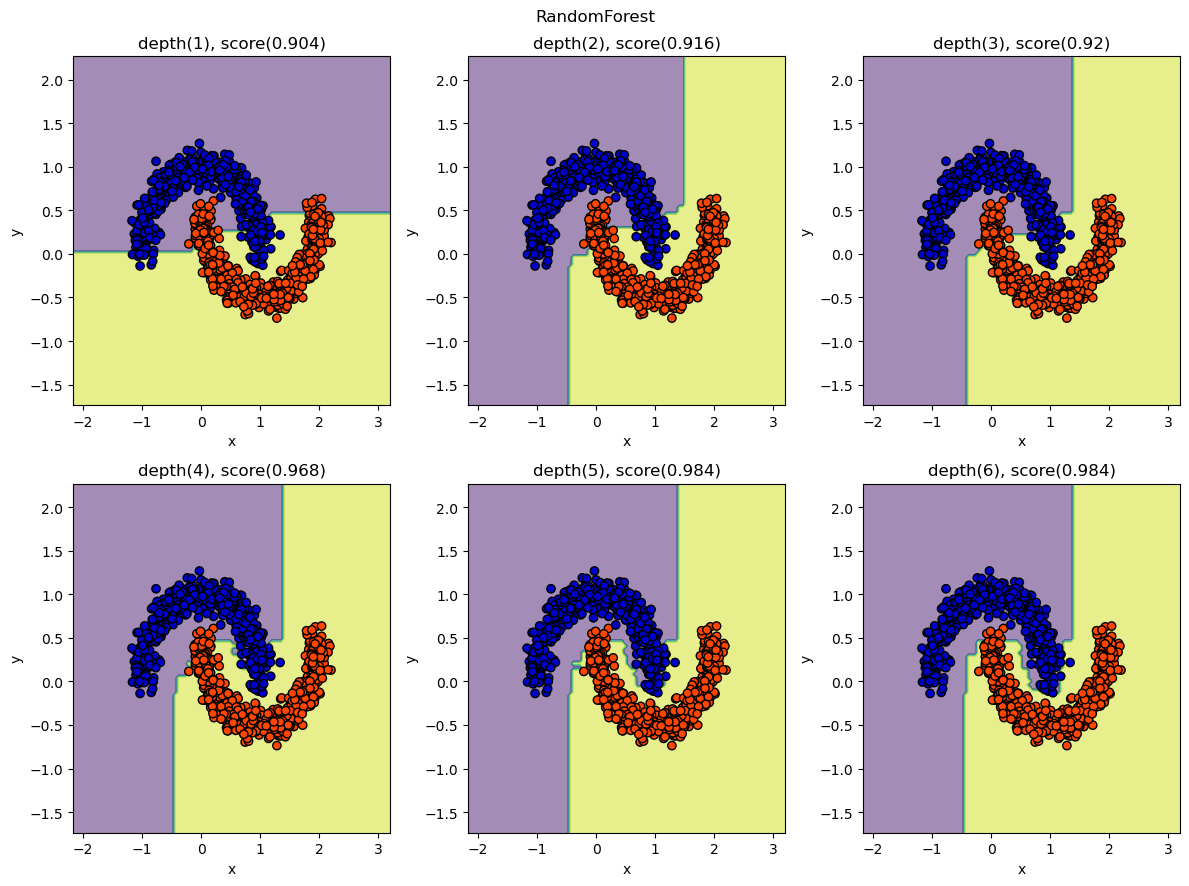

RandomForestClassifier(max_depth=6, random_state=0)

In [9]:
# RandomForest
plot_model(RandomForestClassifier, "RandomForest")

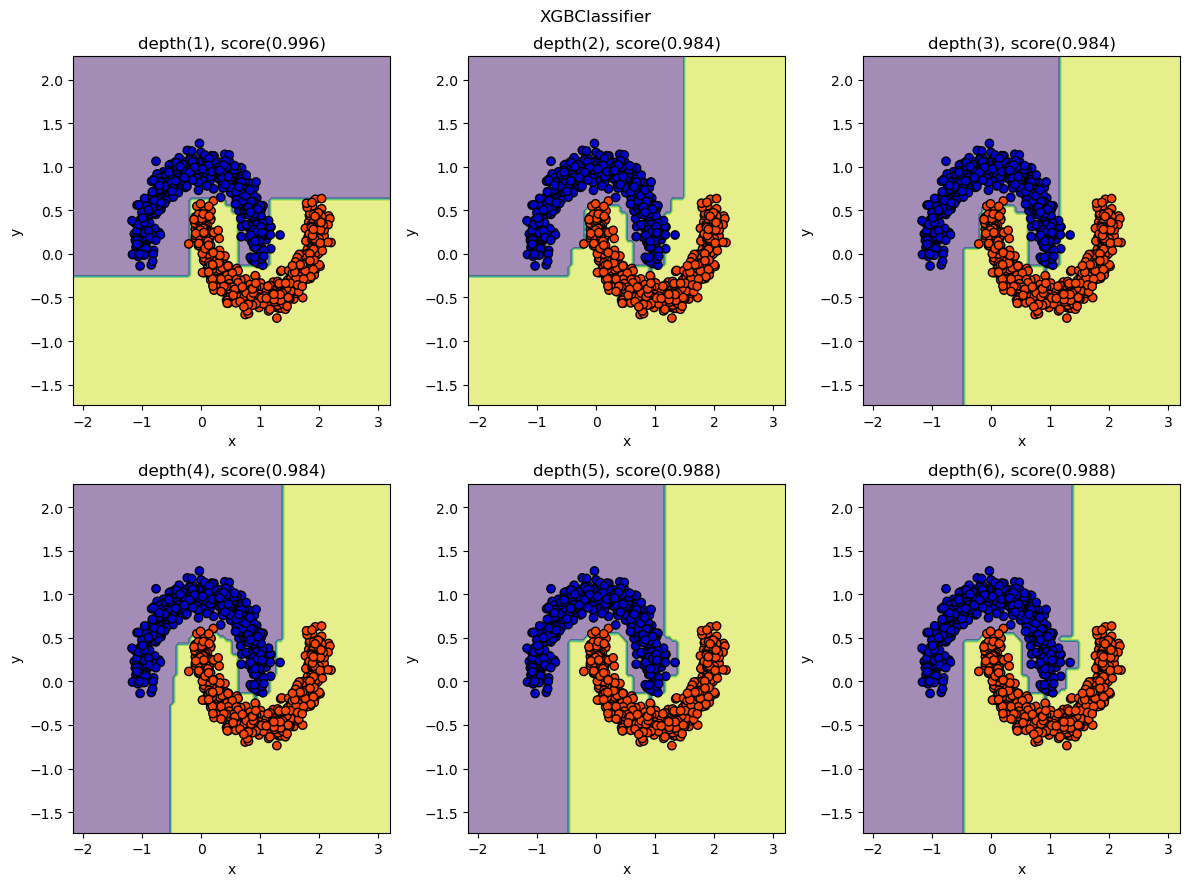

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [10]:
# XGBoost
plot_model(XGBClassifier, "XGBClassifier")